In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline
from matplotlib import cm

Download the data

In [2]:
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/xnodes.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/ynodes.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/elements.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/topo.txt

In [3]:
xnodes = np.loadtxt('./xnodes.txt')
ynodes = np.loadtxt('./ynodes.txt')
elem   = np.loadtxt('./elements.txt').astype('int')
topo   = np.loadtxt('./topo.txt')

Create list of elements (triangles) that have cyclic points

In [4]:
d=xnodes[elem].max(axis=1) - xnodes[elem].min(axis=1)
no_cyclic_elem = [i for (i, val) in enumerate(d) if val < 100]

# NorthPolarStereo maps with cartopy


### We can plot tripcolor map using the same technic we use to plot global maps, by removing ciclic elements:

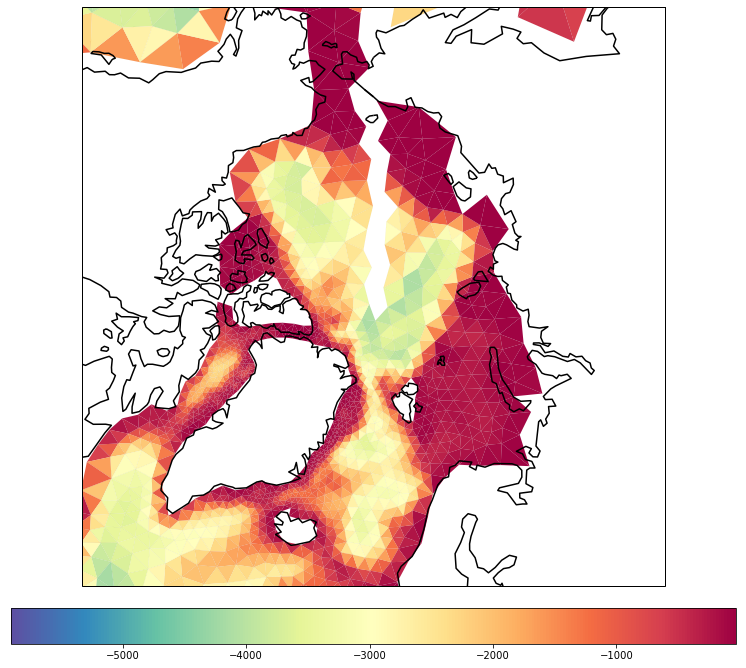

In [5]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.NorthPolarStereo())
ax.set_extent((-180, 180, 60, 90), crs=ccrs.PlateCarree())
mm = ax.tripcolor(xnodes,ynodes, elem[no_cyclic_elem], topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r, 
                  edgecolors='k', lw=0.01, alpha=1,
                  )
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

### But if we use all elemtnes this will happen:

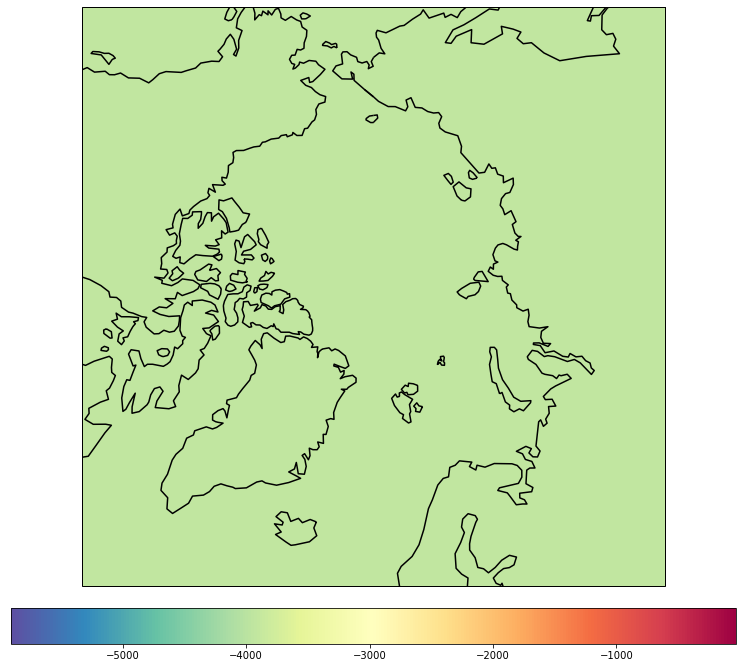

In [7]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.NorthPolarStereo())
ax.set_extent((-180, 180, 60, 90), crs=ccrs.PlateCarree())
mm = ax.tripcolor(xnodes,ynodes, elem, topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r, 
                  edgecolors='k', lw=0.01, alpha=1,
                  )
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

### tricontourf will also show you crazy results.


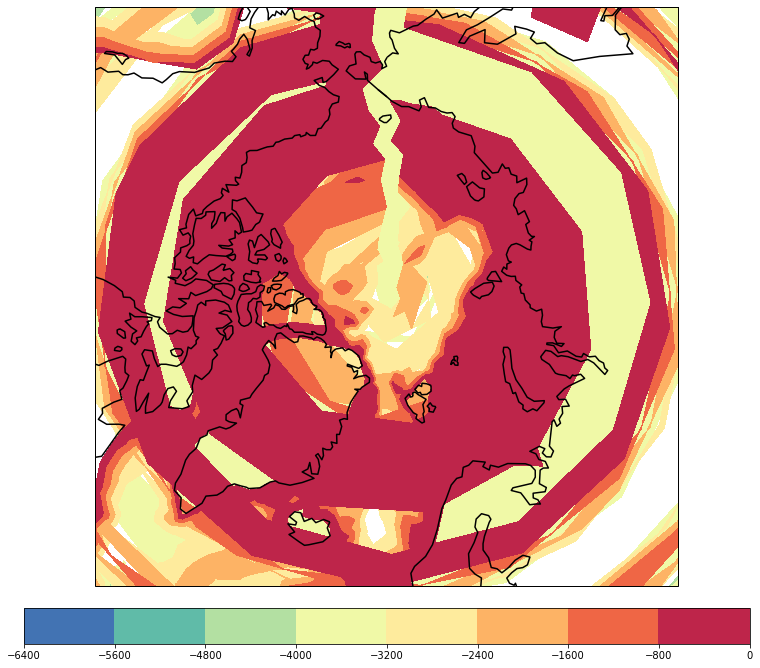

In [9]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.NorthPolarStereo())
ax.set_extent((-180, 180, 60, 90), crs=ccrs.PlateCarree())
mm = ax.tricontourf(xnodes, ynodes, elem, topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r)
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

### However Basemap can plot the data properly. First without cyclic point:

In [10]:
from mpl_toolkits.basemap import Basemap

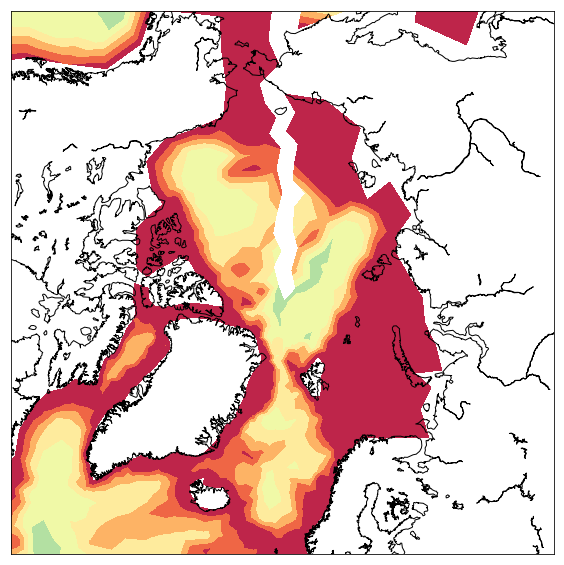

In [11]:
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='l')
        
x, y = m(xnodes, ynodes)

plt.figure(figsize=(10,10))
m.drawcoastlines()
im=plt.tricontourf(x, y, elem[no_cyclic_elem], topo, 
                   cmap=cm.Spectral_r)

### And without it:

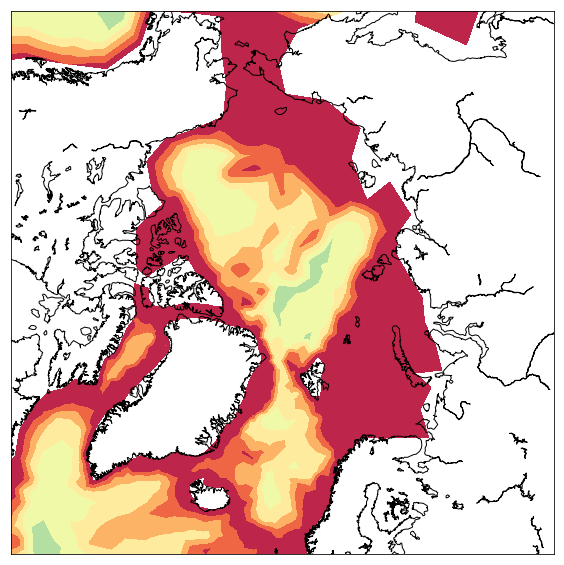

In [12]:
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='l')
        
x, y = m(xnodes, ynodes)

plt.figure(figsize=(10,10))
m.drawcoastlines()
im=plt.tricontourf(x, y, elem, topo, 
                   cmap=cm.Spectral_r)

### Same for tripcolor

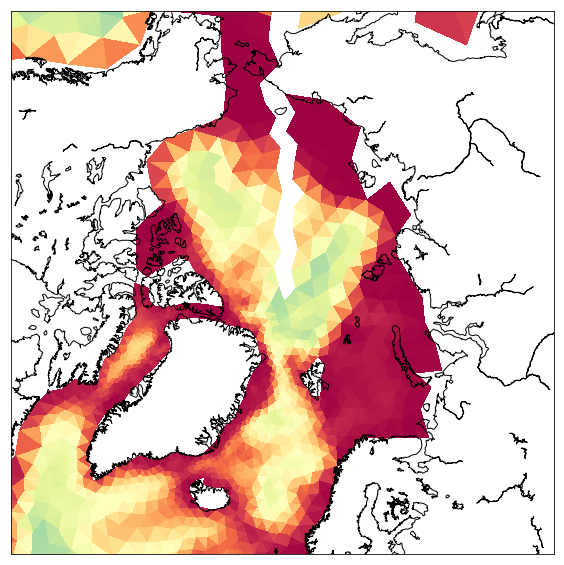

In [13]:
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='l')
        
x, y = m(xnodes, ynodes)

plt.figure(figsize=(10,10))
m.drawcoastlines()
im=plt.tripcolor(x, y, elem[no_cyclic_elem], topo, 
                   cmap=cm.Spectral_r)

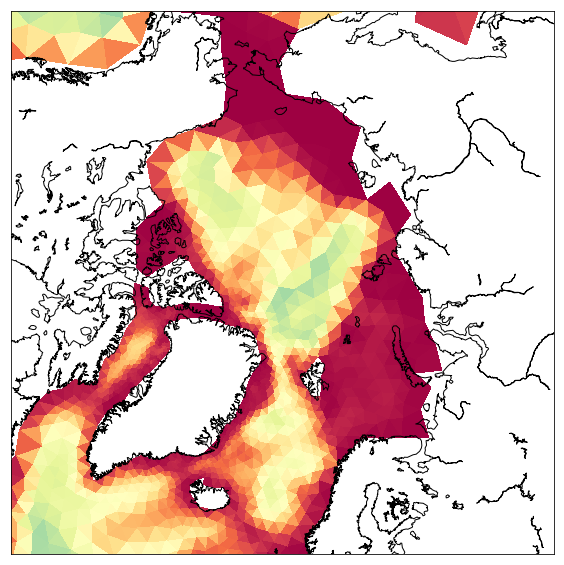

In [14]:
m = Basemap(projection='nplaea',boundinglat=60,lon_0=0,resolution='l')
        
x, y = m(xnodes, ynodes)

plt.figure(figsize=(10,10))
m.drawcoastlines()
im=plt.tripcolor(x, y, elem, topo, 
                   cmap=cm.Spectral_r)